In [1]:
import pandas as pd

# Load the processed dataset
file_path = "E:\\processed_dataset.csv"
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,Sale_ID,Product_ID,Customer_ID,Quantity_Sold,Revenue,Brand,Original_Price,Discounted_Price,Stock_Level,Clearance_Flag,...,Weekday,Is_Weekend,Is_Peak_Season,Discount_Amount,Discount_Percentage,Avg_Competitor_Price,Price_Competitiveness,High_Cart_Abandonment,Revenue_per_Item,Inflation_Category
0,1,6375,9196,2,1551.28,Marvel,1468.03,775.64,42,0,...,3,0,0,692.39,47.164567,775.500,1.000181,1,775.64,Low
1,2,3500,6713,2,32218.96,Tory Burch,16109.48,16109.48,40,0,...,3,0,0,0.00,0.000000,15916.000,1.012156,1,16109.48,Medium
2,3,4063,237,2,2223.28,Jean Paul Gaultier,1111.64,1111.64,41,0,...,5,1,0,0.00,0.000000,1090.460,1.019423,1,1111.64,Low
3,4,1262,6926,2,121348.72,Alienware,60674.36,60674.36,53,1,...,0,0,0,0.00,0.000000,59031.542,1.027829,1,60674.36,Low
4,5,5313,8696,5,69520.90,Urban Ladder,13904.18,13904.18,50,1,...,4,0,0,0.00,0.000000,13999.856,0.993166,1,13904.18,Low


In [2]:
print(df.columns)


Index(['Sale_ID', 'Product_ID', 'Customer_ID', 'Quantity_Sold', 'Revenue',
       'Brand', 'Original_Price', 'Discounted_Price', 'Stock_Level',
       'Clearance_Flag', 'Cart_Abandonment_Rate', 'Amazon_Price',
       'Flipkart_Price', 'Myntra_Price', 'Ajio_Price', 'Snapdeal_Price',
       'Inflation_Rate', 'Consumer_Spending_Index', 'Year', 'Month', 'Day',
       'Hour', 'Weekday', 'Is_Weekend', 'Is_Peak_Season', 'Discount_Amount',
       'Discount_Percentage', 'Avg_Competitor_Price', 'Price_Competitiveness',
       'High_Cart_Abandonment', 'Revenue_per_Item', 'Inflation_Category'],
      dtype='object')


In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Drop unnecessary columns
drop_columns = ["Sale_ID", "Product_ID", "Customer_ID","Inflation_Category"]  # Unique identifiers and names
df.drop(columns=drop_columns, inplace=True)

# Label Encode Brand Name (Convert text to numbers)
le = LabelEncoder()
df["Brand"] = le.fit_transform(df["Brand"])

# # Sample data with 'Inflation_Category' column
# data = {'Inflation_Category': ['high', 'low', 'medium', 'high', 'low']}
# df = pd.DataFrame(data)

# # Initialize the encoder with the correct parameter
# encoder = OneHotEncoder(sparse_output=False)  # Corrected parameter name

# # Fit and transform the column to one-hot encoding
# encoded_values = encoder.fit_transform(df[['Inflation_Category']])

# # Convert the result to a DataFrame for better readability
# encoded_df = pd.DataFrame(encoded_values, columns=encoder.get_feature_names_out(['Inflation_Category']))

# Define Features (X) and Target (y)
target = "Revenue"  # Example target variable
X = df.drop(columns=[target])
y = df[target]

# Check final features
print(X.head())


   Quantity_Sold  Brand  Original_Price  Discounted_Price  Stock_Level  \
0              2     93         1468.03            775.64           42   
1              2    153        16109.48          16109.48           40   
2              2     78         1111.64           1111.64           41   
3              2      4        60674.36          60674.36           53   
4              5    157        13904.18          13904.18           50   

   Clearance_Flag  Cart_Abandonment_Rate  Amazon_Price  Flipkart_Price  \
0               0                  31.25        740.65          785.74   
1               0                  53.33      17690.06        15463.80   
2               0                  31.25       1202.57         1020.42   
3               1                  22.22      62114.01        55146.27   
4               1                  77.78      15024.76        13150.24   

   Myntra_Price  ...  Hour  Weekday  Is_Weekend  Is_Peak_Season  \
0        747.00  ...     5        3        

In [4]:
from sklearn.model_selection import train_test_split

# 80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")

Training Set: (16000, 27), Testing Set: (4000, 27)


✅ XGBoost MSE: 87179701.6689
✅ XGBoost R^2: 0.9852


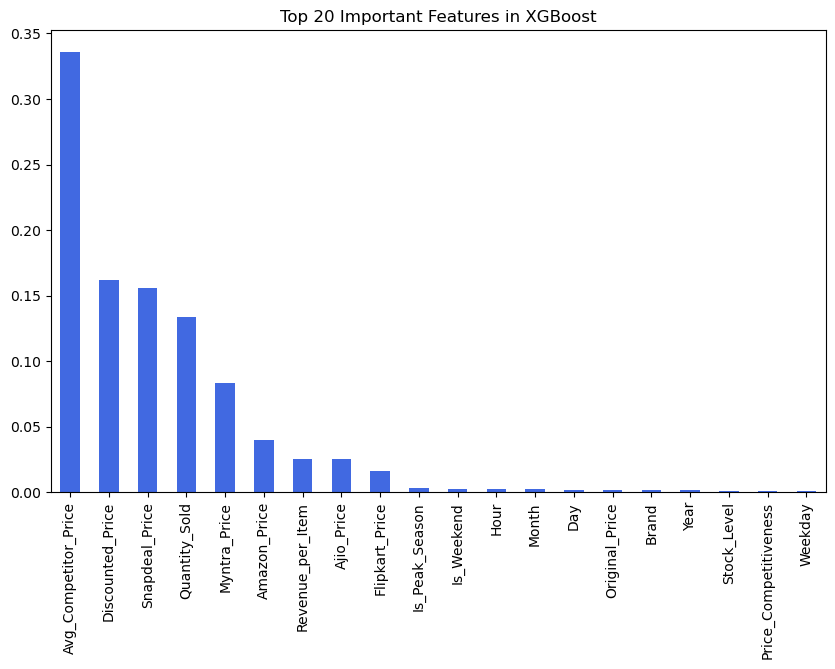

In [5]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 🚀 Initialize and Train XGBoost Regressor Model
xgb_model = XGBRegressor(
    n_estimators=200,  # Number of trees
    learning_rate=0.1,  # Step size
    max_depth=6,  # Tree depth
    colsample_bytree=0.8,  # Subsampling of features
    subsample=0.8,  # Subsampling of rows
    random_state=42
)

xgb_model.fit(X_train, y_train)

# 🔥 Predictions
y_pred = xgb_model.predict(X_test)

# 📊 Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"✅ XGBoost MSE: {mse:.4f}")
print(f"✅ XGBoost R^2: {r2:.4f}")

# 🔍 Feature Importance Plot
feature_importance = pd.Series(xgb_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
feature_importance.sort_values(ascending=False).head(20).plot(kind='bar', color='royalblue')
plt.title("Top 20 Important Features in XGBoost")
plt.show()


In [6]:
import joblib

# Save the XGBoost model using joblib
joblib.dump(xgb_model, "xgboost_model.joblib")

# To load the model later
xgb_model_loaded = joblib.load("xgboost_model.joblib")


In [7]:
# import joblib
# from sklearn.ensemble import RandomForestRegressor

# # Example: Train a Random Forest Regressor (or any other model you want)
# rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# # Assuming you have training data X_train and y_train
# rf_model.fit(X_train, y_train)

# # Save the trained model to the specified file path
# joblib.dump(rf_model, "E:\\rf_model.joblib")

# print("Model saved successfully!")


In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming you have your test data in X_test and y_test
y_pred = xgb_model_loaded.predict(X_test)  # Replace rf_model with your XGBoost model variable

# Calculate MAE, MSE, RMSE, R-squared
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 1173.6862359864808
Mean Squared Error: 87179701.66894229
Root Mean Squared Error: 9337.007104471018
R-squared: 0.9851686571093662


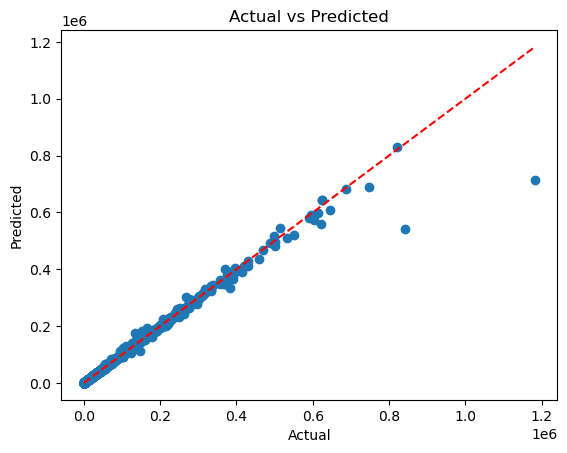

In [9]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


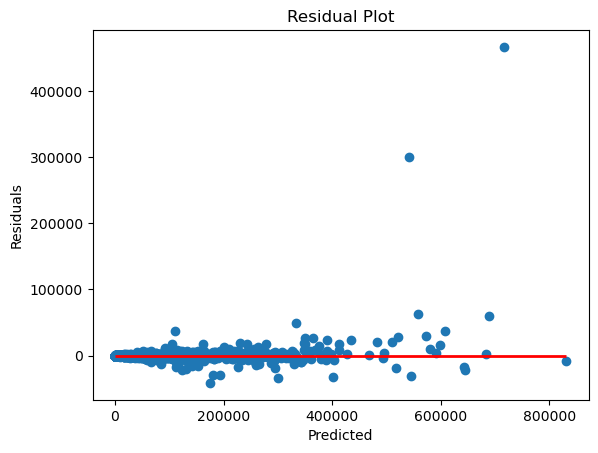

In [10]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linewidth=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


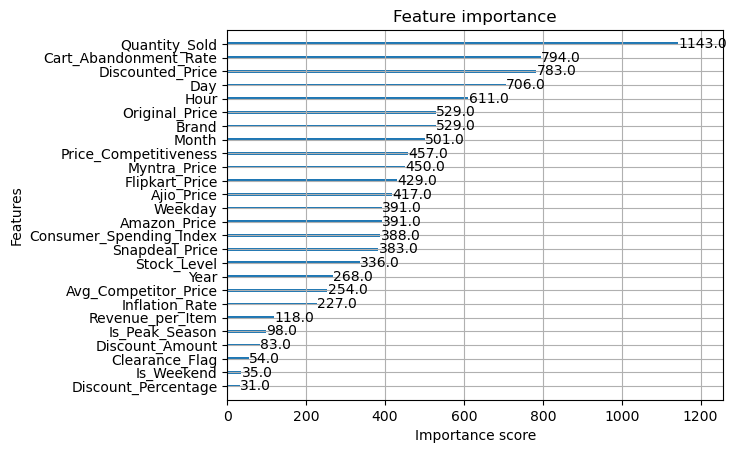

In [11]:
import xgboost as xgb
xgb.plot_importance(xgb_model_loaded)  # Replace rf_model with your XGBoost model
plt.show()


In [12]:
# from sklearn.inspection import plot_partial_dependence
# import matplotlib.pyplot as plt

# # Subsample X_test for faster calculation (optional)
# X_test_sample = X_test.sample(n=1000, random_state=42)  # Adjust the sample size

# # Plot partial dependence with a lower grid resolution for faster calculation
# plot_partial_dependence(xgb_model_loaded, X_test_sample, features=[0, 1, 2], grid_resolution=50)
# plt.show()


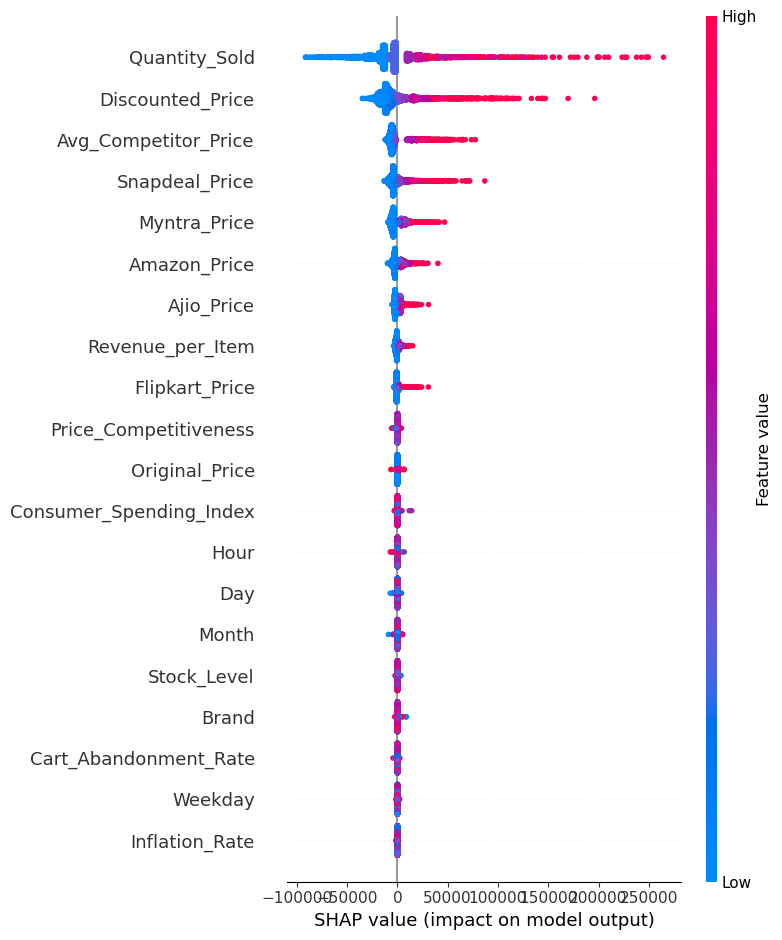

In [13]:
import shap

# Create a SHAP explainer for your model
explainer = shap.TreeExplainer(xgb_model_loaded)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot (distribution of SHAP values)
shap.summary_plot(shap_values, X_test)


In [14]:
import sklearn
print(sklearn.__version__)


1.5.1


In [15]:
# pip install shap


Note: you may need to restart the kernel to use updated packages.


In [32]:
print(X_train)
print(X_test)

       Quantity_Sold  Brand  Original_Price  Discounted_Price  Stock_Level  \
5894               1    112        48837.43          40986.27           41   
3728               1     15        56752.88          56752.88           56   
8958               4     21        14284.22          14284.22           49   
7671               1    169         7586.37           7586.37           48   
5999               3    150         2482.23           2140.26           53   
...              ...    ...             ...               ...          ...   
11284              4    130         1720.69           1544.63           46   
11964              1     32          706.50            476.44           51   
5390               3    155         2358.53           1272.11           51   
860                2    171         1936.58           1936.58           52   
15795              5     29         2925.70           2925.70           56   

       Clearance_Flag  Cart_Abandonment_Rate  Amazon_Price  Fli